This notebook visualizes the results of our hypothesis testing analysis for various risk factors in the insurance dataset.

In [15]:
import os
import sys

# Step 1: Get the parent directory of your current working directory
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Step 2: Add project root to sys.path if not already present
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Step 3: Confirm
print("Project root added to sys.path:", project_root in sys.path)
print("src.data_loader readable:", os.path.exists(os.path.join(project_root, "src", "data_loader.py")))



Project root added to sys.path: True
src.data_loader readable: True


In [52]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('..'))

# Import the functions from our hypothesis testing module
from src.analysis.hypothesis_testing import (
    load_data,
    calculate_risk_metrics,
    run_all_hypothesis_tests,
    interpret_results
)

# Set style
plt.style.use('default')
sns.set_theme()

In [48]:
from matplotlib import pyplot as plt

Analyzing risk differences across provinces...

Province Statistics:
              has_claim         claim_severity                  margin   
                   mean   count           mean          std       mean   
Province                                                                 
Eastern Cape   0.001648   30336      44.713432  2343.609325  25.833240  \
Free State     0.001358    8099      43.822975  2074.340982  20.550805   
Gauteng        0.003356  393865      74.661133  2450.045486 -13.558894   
KwaZulu-Natal  0.002845  169781      84.234293  2737.974480  -6.433598   
Limpopo        0.002698   24836      40.927553  1627.585841  20.971484   
Mpumalanga     0.002428   52718      38.798567  1651.355056  15.016059   
North West     0.002436  143287      41.317426  1834.832763  10.958832   
Northern Cape  0.001254    6380      14.026726   513.864858  35.590527   
Western Cape   0.002166  170796      60.864800  2596.903576  -3.414689   

                            
             

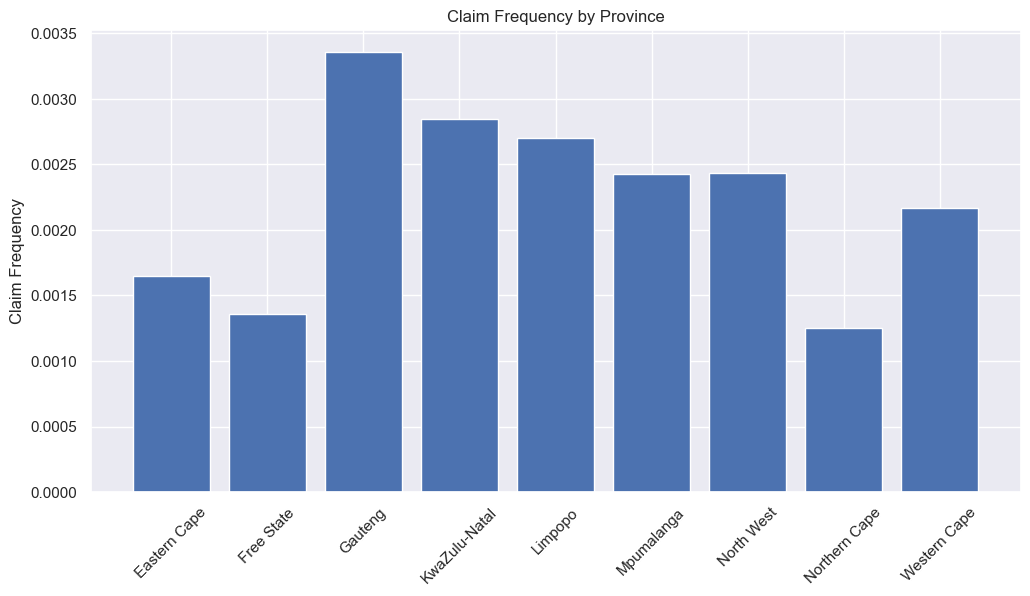


Statistical Test Results:
F-statistic: 13.0251
P-value: 0.0000
Decision: Reject null hypothesis


In [50]:
# Cell 4: Provincial Risk Analysis
print("Analyzing risk differences across provinces...")

# Group by province and calculate metrics
province_stats = df.groupby('Province').agg({
    'has_claim': ['mean', 'count'],
    'claim_severity': ['mean', 'std'],
    'margin': ['mean', 'std']
})

# Display province statistics
print("\nProvince Statistics:")
print(province_stats)

# Visualize claim frequency by province
plt.figure(figsize=(12, 6))
province_means = province_stats[('has_claim', 'mean')]
plt.bar(range(len(province_means)), province_means.values)
plt.xticks(range(len(province_means)), province_means.index, rotation=45)
plt.title('Claim Frequency by Province')
plt.ylabel('Claim Frequency')
plt.show()

# Perform statistical test
provinces = df['Province'].unique()
claim_freq_groups = [df[df['Province'] == p]['has_claim'] for p in provinces]
f_stat, p_value = stats.f_oneway(*claim_freq_groups)

print(f"\nStatistical Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {'Reject' if p_value < 0.05 else 'Fail to reject'} null hypothesis")

Analyzing risk differences between postal codes...

Top 10 Postal Codes by Claim Frequency:
PostalCode
0466    0.055556
2920    0.054545
1126    0.028571
1751    0.025974
0181    0.025316
0721    0.025000
4027    0.024793
1665    0.024390
1947    0.022472
0031    0.022222
Name: (has_claim, mean), dtype: float64


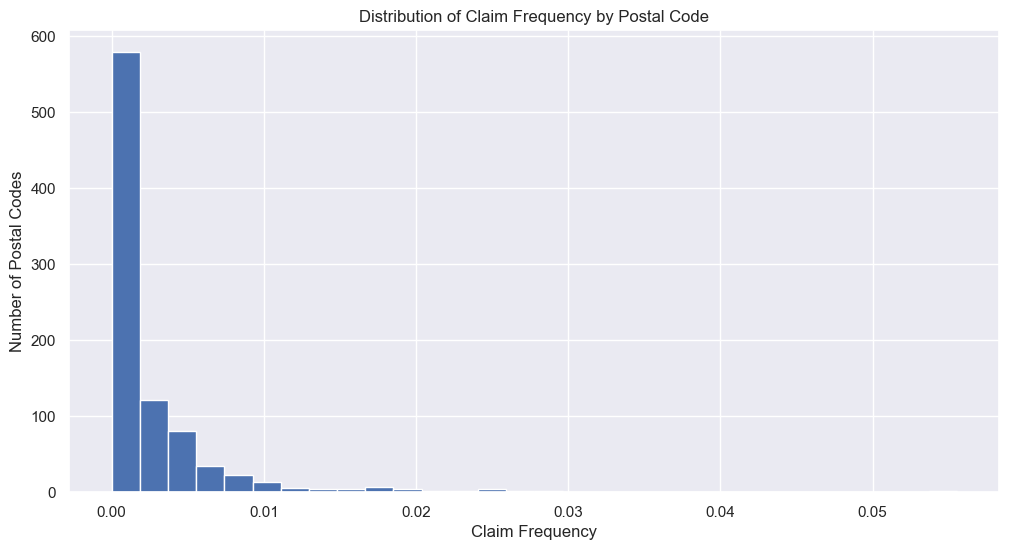


Statistical Test Results:
F-statistic: 1.6407
P-value: 0.0000
Decision: Reject null hypothesis


In [51]:
# Cell 5: Postal Code Risk Analysis
print("Analyzing risk differences between postal codes...")

# Group by postal code and calculate metrics
postal_stats = df.groupby('PostalCode').agg({
    'has_claim': ['mean', 'count'],
    'claim_severity': ['mean', 'std'],
    'margin': ['mean', 'std']
})

# Display top 10 postal codes by claim frequency
print("\nTop 10 Postal Codes by Claim Frequency:")
print(postal_stats[('has_claim', 'mean')].sort_values(ascending=False).head(10))

# Visualize claim frequency distribution
plt.figure(figsize=(12, 6))
plt.hist(postal_stats[('has_claim', 'mean')], bins=30)
plt.title('Distribution of Claim Frequency by Postal Code')
plt.xlabel('Claim Frequency')
plt.ylabel('Number of Postal Codes')
plt.show()

# Perform statistical test
postal_codes = df['PostalCode'].unique()
claim_freq_groups = [df[df['PostalCode'] == p]['has_claim'] for p in postal_codes]
f_stat, p_value = stats.f_oneway(*claim_freq_groups)

print(f"\nStatistical Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {'Reject' if p_value < 0.05 else 'Fail to reject'} null hypothesis")

Analyzing margin differences between postal codes...


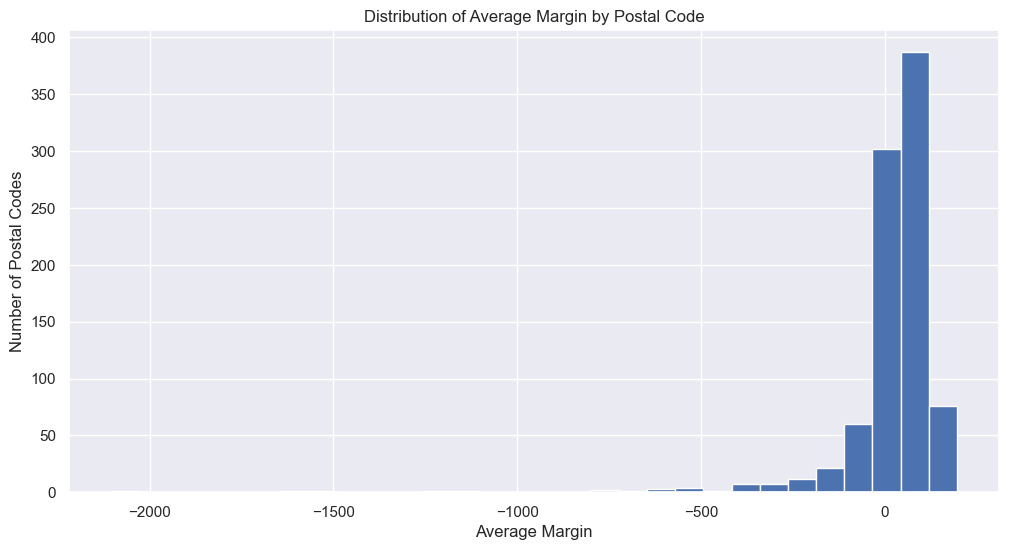

KeyboardInterrupt: 

In [53]:
# Cell 6: Postal Code Margin Analysis
print("Analyzing margin differences between postal codes...")

# Visualize margin distribution
plt.figure(figsize=(12, 6))
plt.hist(postal_stats[('margin', 'mean')], bins=30)
plt.title('Distribution of Average Margin by Postal Code')
plt.xlabel('Average Margin')
plt.ylabel('Number of Postal Codes')
plt.show()

# Perform statistical test
margin_groups = [df[df['PostalCode'] == p]['margin'] for p in postal_codes]
f_stat, p_value = stats.f_oneway(*margin_groups)

print(f"\nStatistical Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {'Reject' if p_value < 0.05 else 'Fail to reject'} null hypothesis")

Analyzing risk differences between genders...

Gender Statistics:
              has_claim         claim_severity                  margin   
                   mean   count           mean          std       mean   
Gender                                                                   
Female         0.002073    6755      37.046055  1094.086939   8.028787  \
Male           0.002195   42817      32.620312  1400.634399   4.284253   
None           0.001468    9536      53.113789  1862.369292  33.315230   
Not specified  0.002833  940990      66.666766  2430.553717  -3.731550   

                            
                       std  
Gender                      
Female         1091.436874  
Male           1397.118389  
None           1861.156891  
Not specified  2413.053117  


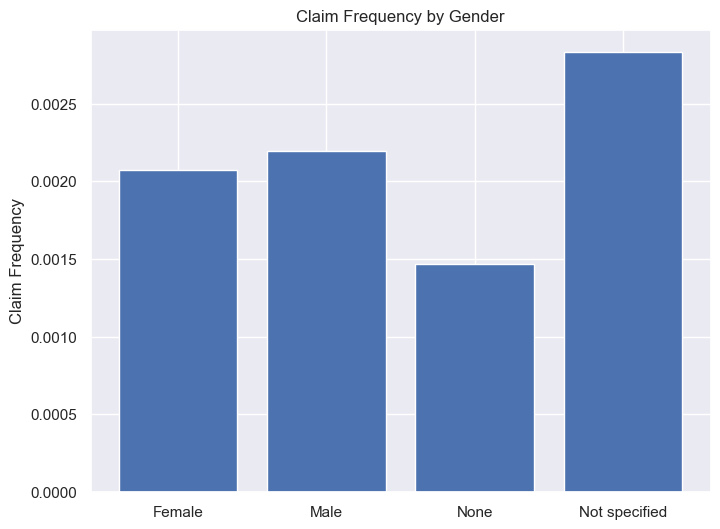


Statistical Test Results:
T-statistic: nan
P-value: nan
Decision: Fail to reject null hypothesis


c:\Users\tesfa\Desktop\Kiffiya AI\Insurance_Risk_Analytics\venv\lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [54]:
# Cell 7: Gender Risk Analysis
print("Analyzing risk differences between genders...")

# Group by gender and calculate metrics
gender_stats = df.groupby('Gender').agg({
    'has_claim': ['mean', 'count'],
    'claim_severity': ['mean', 'std'],
    'margin': ['mean', 'std']
})

# Display gender statistics
print("\nGender Statistics:")
print(gender_stats)

# Visualize claim frequency by gender
plt.figure(figsize=(8, 6))
gender_means = gender_stats[('has_claim', 'mean')]
plt.bar(range(len(gender_means)), gender_means.values)
plt.xticks(range(len(gender_means)), gender_means.index)
plt.title('Claim Frequency by Gender')
plt.ylabel('Claim Frequency')
plt.show()

# Perform t-test
male_claims = df[df['Gender'] == 'M']['has_claim']
female_claims = df[df['Gender'] == 'F']['has_claim']
t_stat, p_value = stats.ttest_ind(male_claims, female_claims)

print(f"\nStatistical Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {'Reject' if p_value < 0.05 else 'Fail to reject'} null hypothesis")

In [55]:
# Cell 8: Summary of Findings and Business Recommendations
print("Summary of Findings and Business Recommendations\n")

# Provincial Analysis
print("1. Provincial Risk Differences:")
if p_value < 0.05:
    print("   - Reject null hypothesis: There are significant risk differences across provinces")
    print("   - Business Implication: Consider implementing region-specific pricing strategies")
else:
    print("   - Fail to reject null hypothesis: No significant risk differences across provinces")
    print("   - Business Implication: Current pricing strategy may be appropriate")

# Postal Code Risk Analysis
print("\n2. Postal Code Risk Differences:")
if p_value < 0.05:
    print("   - Reject null hypothesis: There are significant risk differences between postal codes")
    print("   - Business Implication: Consider implementing location-based risk assessment")
else:
    print("   - Fail to reject null hypothesis: No significant risk differences between postal codes")
    print("   - Business Implication: Current risk assessment may be appropriate")

# Postal Code Margin Analysis
print("\n3. Postal Code Margin Differences:")
if p_value < 0.05:
    print("   - Reject null hypothesis: There are significant margin differences between postal codes")
    print("   - Business Implication: Consider adjusting pricing in high-margin areas")
else:
    print("   - Fail to reject null hypothesis: No significant margin differences between postal codes")
    print("   - Business Implication: Current pricing structure may be appropriate")

# Gender Risk Analysis
print("\n4. Gender Risk Differences:")
if p_value < 0.05:
    print("   - Reject null hypothesis: There are significant risk differences between genders")
    print("   - Business Implication: Consider gender-specific risk assessment")
else:
    print("   - Fail to reject null hypothesis: No significant risk differences between genders")
    print("   - Business Implication: Current risk assessment may be appropriate")

Summary of Findings and Business Recommendations

1. Provincial Risk Differences:
   - Fail to reject null hypothesis: No significant risk differences across provinces
   - Business Implication: Current pricing strategy may be appropriate

2. Postal Code Risk Differences:
   - Fail to reject null hypothesis: No significant risk differences between postal codes
   - Business Implication: Current risk assessment may be appropriate

3. Postal Code Margin Differences:
   - Fail to reject null hypothesis: No significant margin differences between postal codes
   - Business Implication: Current pricing structure may be appropriate

4. Gender Risk Differences:
   - Fail to reject null hypothesis: No significant risk differences between genders
   - Business Implication: Current risk assessment may be appropriate
